# Introduction to Computational Science
# Assignment 2

## Gillespie Algorithm

1. Generate two random numbers between 0 and 1
2. Estimate time until next event based on cumulative rates of all possible events.
3. Convert event rates into probabilities by randomly selecting one of these events.
4. Repeat this process to iterate the model through time.


### Events:
1. Birth X→X+1
2. Transmission Y→ Y + 1 and X→ X −1
3. Recovery Y→Y−1 and Z→ Z + 1
4. Death, three independent events, X→ X − 1, Y → Y − 1, Z→ Z − 1
5. Import via migration Y→ Y + 1
6. Import via external infection Y → Y + 1, X→ X - 1

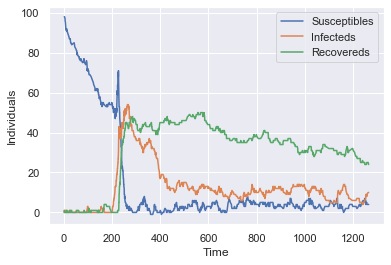

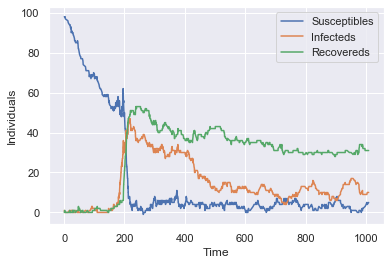

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import random
import pandas as pd

class Gillespie:

    def __init__(self, X, Y, beta, gamma, mu):
        self.beta = beta
        self.gamma = gamma
        self.mu = mu
        self.delta = 0.01
        self.epsilon = 0.001
        self.N = 100
        self.X = X
        self.Y = Y
        self.Z = 0
        self.T = 0


    def get_rates(self, X, Y, Z):
        """
        Determine at which rate an event occurs.
        """
        rate_E1 = self.mu * self.N
        rate_E2 = self.beta * self.X * self.Y / self.N
        rate_E3 = self.gamma * self.Y
        rate_E4 = self.mu * self.X
        rate_E5 = self.mu * self.Y
        rate_E6 = self.mu * self.Z
        rate_E7 = self.delta   * 0
        rate_E8 = self.epsilon * self.X  * 0

        events = [rate_E1, rate_E2, rate_E3, rate_E4, rate_E5, rate_E6, rate_E7, rate_E8]

        return events

    def gillespie(self):
        """
        Choose the next time and event.
        """

        # Generate two random numbers between 0 and 1.
        random_time = np.random.rand()

        events = self.get_rates(self.X, self.Y, self.Z)

        Rtotal = sum(events)

        # Get reaction time
        tau = (1.0/Rtotal) * np.log((1.0/random_time))
        self.T += tau

        # Determine which event occurs
        # Make list of reaction intervals
        rates = []
        for i in events:
            rates.append(i/Rtotal)

        random_event = random.uniform(0, max(rates))

        # Find event to be executed based on closest number to
        # a random number in rates-array
        found = self.find_nearest(rates, random_event)

        # Retrieve which event is related to this interval
        for k in range(len(rates)):
            if rates[k] == found:
                index = k
                break

        # Birth
        if index == 0:
            self.X += 1

        # Transmission
        elif index == 1:
            self.Y += 1
            self.X -= 1

        # Recovery
        elif index == 2:
            self.Z += 1
            self.Y -= 1

        # Death
        elif index == 3:
            self.X -= 1
        elif index == 4:
            self.Y -= 1
        elif index == 5:
            self.Z -= 1
        
        # Import via immigration
        elif index == 6:
            self.Y += 1
            
        # Import via external infection
        else:
            self.Y += 1
            self.X -= 1
        
        return self.X, self.Y, self.Z, self.T

    def find_nearest(self, array, value):
        """
        Find nearest value in array.
        """

        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return array[idx]


if __name__ == '__main__':

    for i in range(2):
        gillespie = Gillespie(99, 1, 1/3, 0.01, 0.003)

        plots = []
        time = []
        

        for j in range(1000):
            X, Y, Z, T = gillespie.gillespie()
            plots.append([X, Y, Z])
            time.append(T)


        # plt.plot(time, Xs)
        plt.plot(time, plots)
        plt.legend(['Susceptibles', 'Infecteds', 'Recovereds'], loc="upper right")
        plt.xlabel("Time")
        plt.ylabel("Individuals")
        plt.show()


## 1. Variability
### Run several models with the same initial conditions to do a statistical analysis on variance

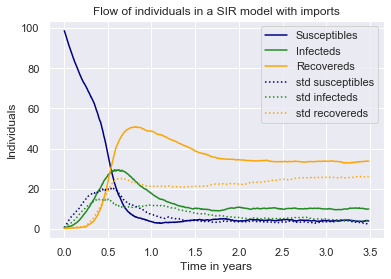

Fixed point for X =  3.98
Fixed point for Y =  9.87
Fixed point for Z =  33.71

Mean of X =  18.657610000000002 variance =  25.156801199435115
Mean of Y =  14.515559999999999 variance =  7.563387381749001
Mean of Z =  31.84246 variance =  14.36921193205807


In [12]:
totalX = []
totalY = []
totalZ = []
totalT = []

for i in range(100): 
    gillespie = Gillespie(99, 1, 1/3, 0.01, 0.003)

    plots = []
    time = []
    Xs = []
    Ys = []
    Zs = []
    Ts = []


    for j in range(1000):
        X, Y, Z, T = gillespie.gillespie()
        plots.append([X, Y, Z])
        time.append(T)
        Xs.append(X)
        Ys.append(Y)
        Zs.append(Z)
        Ts.append(T/365)

    totalX.append(Xs)
    totalY.append(Ys)
    totalZ.append(Zs)
    totalT.append(Ts)
    
    
    
    
    

def getMeans(X0, Y0):

    totalX, totalY, totalZ, totalT = [], [], [], []


    for i in range(100):
        gillespie = Gillespie(X0, Y0, 1/3, 0.01, 0.001)

        plots, time, Xs, Ys, Zs, Ts = [], [], [], [], [], []

        for j in range(1000):
            X, Y, Z, T = gillespie.gillespie()
            plots.append([X, Y, Z])
            time.append(T)
            Xs.append(X)
            Ys.append(Y)
            Zs.append(Z)
            Ts.append(T / 365)

        totalX.append(Xs)
        totalY.append(Ys)
        totalZ.append(Zs)
        totalT.append(Ts)


    # Calculate means
    meansX = [np.mean([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
    barsX = [np.std([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
    meansY = [np.mean([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
    barsY = [np.std([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
    meansZ = [np.mean([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
    barsZ = [np.std([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
    totalT = [np.mean([x[i] for x in totalT if len(x) > i]) for i in range(len(max(totalT,key=len)))]
    
    return meansX, meansY, meansZ, barsX, barsY, barsZ, totalT
    
X0 = 99
Y0 = 1

# TODO: errorbars plotten om variatie te laten zien of confidence interval (seaborn?)
# meansX, meansY, meansZ, barsX, barsY, barsZ, totalT = getMeans(X0, Y0)


        
        

# Calculate means
meansX = [np.mean([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
barsX = [np.std([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
meansY = [np.mean([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
barsY = [np.std([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
meansZ = [np.mean([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
barsZ = [np.std([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
totalT = [np.mean([x[i] for x in totalT if len(x) > i]) for i in range(len(max(totalT,key=len)))]

# TODO: errorbars plotten om variatie te laten zien of confidence interval (seaborn?)
plt.plot(totalT, meansX, color="navy")
plt.plot(totalT, meansY, color="forestgreen")
plt.plot(totalT, meansZ, color="orange")
plt.plot(totalT, barsX, color="navy", linestyle=":")
plt.plot(totalT, barsY, color="forestgreen", linestyle=":")
plt.plot(totalT, barsZ, color="orange", linestyle=":")
plt.legend(['Susceptibles', 'Infecteds', 'Recovereds', "std susceptibles", "std infecteds", "std recovereds"], loc="upper right")
plt.xlabel("Time in years")
plt.ylabel("Individuals")
plt.title("Flow of individuals in a SIR model with imports")
plt.show()

print("Fixed point for X = ", meansX[-1])
print("Fixed point for Y = ", meansY[-1])
print("Fixed point for Z = ", meansZ[-1])
print("")
print("Mean of X = ", np.mean(meansX), "variance = ", np.std(meansX))
print("Mean of Y = ", np.mean(meansY), "variance = ", np.std(meansY))
print("Mean of Z = ", np.mean(meansZ), "variance = ", np.std(meansZ))



## 2. Covariance between S and I

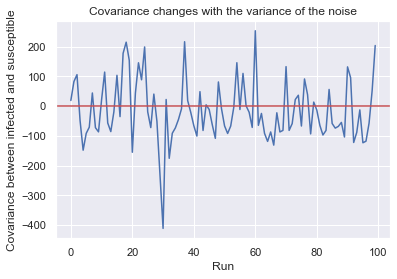

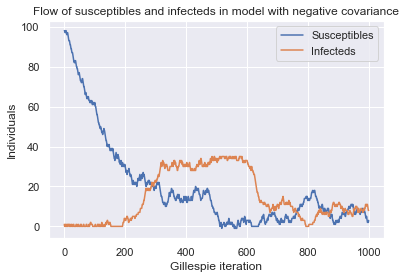

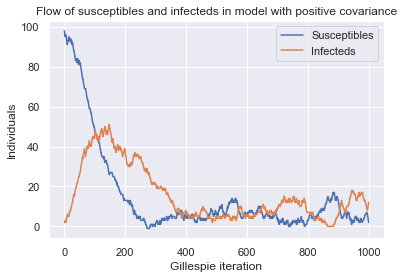

In [5]:
def covariance():
    """
    Return covariance between susceptibles (X) and infecteds (Y).
    """

    
    covariances, negativesX, negativesY = [], [], []
    positiveX, positiveY = [], []
    
    for i in range(len(totalX)):
        cov = np.cov(totalX[i], totalY[i])[0][1]
        covariances.append(cov)
        if cov < -100:
            negativesX.append(totalX[i])
            negativesY.append(totalY[i])
        elif cov > 100:
            positiveX.append(totalX[i])
            positiveY.append(totalY[i])
            
    return covariances, negativesX, negativesY, positiveX, positiveY

covariances, negativeX, negativeY, positiveX, positiveY = covariance()

plt.plot(covariances)
plt.ylabel("Covariance between infected and susceptible")
plt.xlabel("Run")
plt.title("Covariance changes with the variance of the noise")
plt.axhline(y=0, color='r')
plt.show()

plt.title("Flow of susceptibles and infecteds in model with negative covariance")
plt.ylabel("Individuals")
plt.xlabel("Gillespie iteration")
plt.plot(negativeX[0])
plt.plot(negativeY[0])
plt.legend(["Susceptibles", "Infecteds"])
plt.show()

plt.title("Flow of susceptibles and infecteds in model with positive covariance")
plt.ylabel("Individuals")
plt.xlabel("Gillespie iteration")
plt.plot(positiveX[0])
plt.plot(positiveY[0])
plt.legend(["Susceptibles", "Infecteds"])
plt.show()


    

## 3. Increased transients
### For stochastic models, we need to consider both the long-term behavior and the short-term “transient” dynamics.

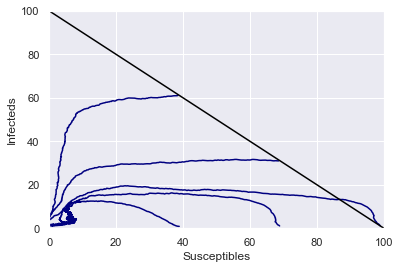

In [6]:
X0 = 99
Y0 = 1

for i in range(3):
    meansX, meansY, meansZ, barsX, barsY, barsZ, totalT = getMeans( X0, Y0)
    plt.plot(meansX, meansY, color="navy")
    X0 -= 30

X0 = 69
Y0 = 31
for i in range(2):
    meansX, meansY, meansZ, barsX, barsY, barsZ, totalT = getMeans( X0, Y0)
    plt.plot(meansX, meansY, color="navy")
    X0 -= 30
    Y0 += 30

plt.ylim([0,100])
plt.xlim([0,100])
plt.plot([100, 0], [0, 100], color="black")
plt.xlabel("Susceptibles")
plt.ylabel("Infecteds")
plt.show()


## 4. Stochastic resonance

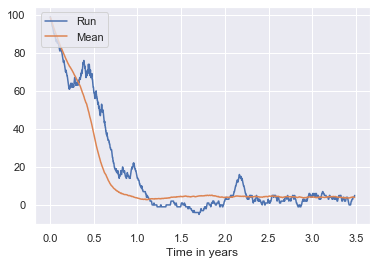

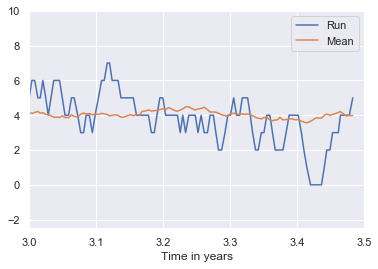

In [39]:
plt.plot(totalT, totalX[0])
plt.plot(totalT, meansX)
plt.legend(["Run", "Mean"], loc="upper left")
plt.xlabel("Susceptibles")
plt.xlabel("Time in years")
plt.show()

plt.xlim([3,3.5])
plt.ylim([-2.5,10])
plt.plot(totalT, totalX[0])
plt.plot(totalT, meansX)
plt.legend(["Run", "Mean"])
plt.xlabel("Susceptibles")
plt.xlabel("Time in years")
plt.show()

## 5. Extinction

R0 =  25.64102564102564
P extinction =  0.029997300242978135


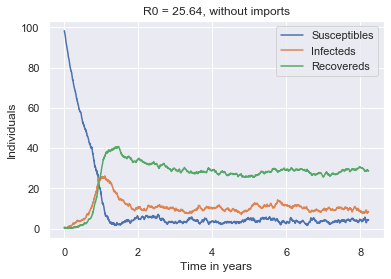

R0 =  0.7374631268436577
P extinction =  1.314793418064465


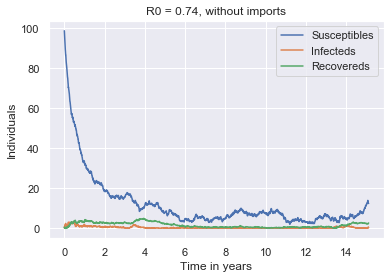

In [8]:
def getMeansExtinctions(beta, gamma, mu):

    totalX, totalY, totalZ, totalT = [], [], [], []


    for i in range(10):
        gillespie = Gillespie(99, 1, beta, gamma, mu)

        plots, time, Xs, Ys, Zs, Ts = [], [], [], [], [], []

        for j in range(2000):
            X, Y, Z, T = gillespie.gillespie()
            plots.append([X, Y, Z])
            time.append(T)
            Xs.append(X)
            Ys.append(Y)
            Zs.append(Z)
            Ts.append(T/365)

        totalX.append(Xs)
        totalY.append(Ys)
        totalZ.append(Zs)
        totalT.append(Ts)


    # Calculate means
    meansX = [np.mean([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
    barsX = [np.std([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
    meansY = [np.mean([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
    barsY = [np.std([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
    meansZ = [np.mean([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
    barsZ = [np.std([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
    totalT = [np.mean([x[i] for x in totalT if len(x) > i]) for i in range(len(max(totalT,key=len)))]
    
    return meansX, meansY, meansZ, barsX, barsY, barsZ, totalT


beta, gamma, mu = 1/3, 0.01, 0.003

for i in range(2):
    
    meansX, meansY, meansZ, barsX, barsY, barsZ, totalT = getMeansExtinctions(beta, gamma, mu)
    R0 = round((beta / (gamma + mu)),2)
    print("R0 = ",  (beta / (gamma + mu)))
    print("P extinction = ", 1 / (beta / gamma + mu))
    
    plt.xlabel("Time in years")
    plt.ylabel("Individuals")
    plt.plot(totalT, meansX)
    plt.plot(totalT, meansY)
    plt.plot(totalT, meansZ)
    plt.legend(["Susceptibles", "Infecteds", "Recovereds"], loc="upper right")
    plt.title("R0 = " + str(R0) + ", without imports" ) 
    plt.show()
    
    beta -= 0.25
    gamma += 0.1



# 2. Meta-populations

## Consider two large, fully susceptible populations, with ρii = 1 and ρij < 1. Assume the populations are of the same size, and ignore demography.
### --> What is the effect of the coupling between the two populations, are there any delays?

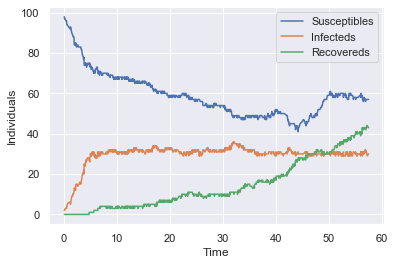

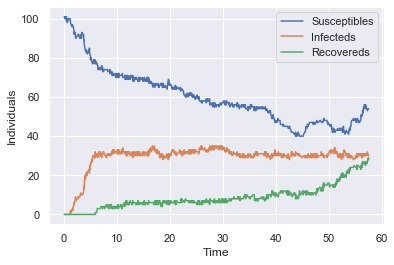

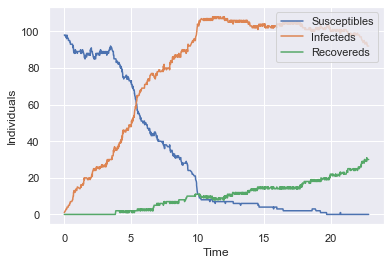

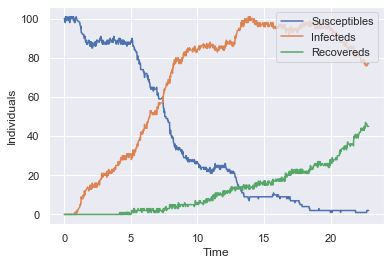

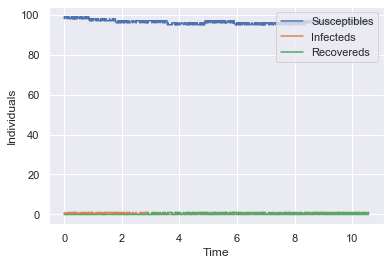

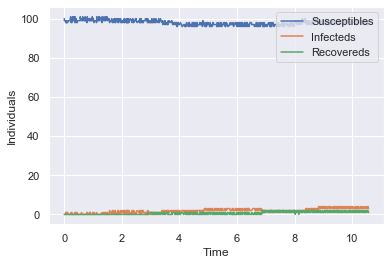

In [244]:

"""
Stochastic Meta Model
"""
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import random
import pandas as pd

class Gillespie:

    def __init__(self, X, Y, beta, gamma, mu, coupling):
        self.beta = beta
        self.gamma = gamma
        self.mu = mu
        self.delta = 0.01
        self.epsilon = 0.001
        self.N = 100
        self.X = X
        self.Y = Y
        self.Z = 0
        self.T = 0
        self.coupling = coupling
        self.moved = None


    def get_rates(self, X, Y, Z):
        """
        Determine at which rate an event occurs.
        """
        # Birth
        rate_E1 = self.mu * self.N
        
        # Transmission
        rate_E2 = self.beta * self.X * self.Y / self.N
        
        # Recovery
        rate_E3 = self.gamma * self.Y
        
        # Death
        rate_E4 = self.mu * self.X
        rate_E5 = self.mu * self.Y
        rate_E6 = self.mu * self.Z
        
        # Movement
        rate_E7 = self.coupling * self.X
        rate_E8 = self.coupling * self.Y
        rate_E9 = self.coupling * self.Z


        events = [rate_E1, rate_E2, rate_E3, rate_E4, rate_E5, rate_E6, rate_E7, rate_E8, rate_E9]

        return events

    def gillespie(self, other, time):
        """
        Choose the next time and event.
        """

        events = self.get_rates(self.X, self.Y, self.Z)

        Rtotal = sum(events)

        # Get reaction time for both subpopulations
        if time:
            random_time = np.random.rand()
            tau = (1.0/Rtotal) * np.log((1.0/random_time))
            self.T += tau
            other.T += tau

        # Determine which event occurs
        # Make list of reaction intervals
        rates = []
        for i in events:
            rates.append(i/Rtotal)

        random_event = random.uniform(0, max(rates))

        # Find event to be executed based on closest number to
        # a random number in rates-array
        found = self.find_nearest(rates, random_event)

        # Retrieve which event is related to this interval
        for k in range(len(rates)):
            if rates[k] == found:
                index = k
                break

        # Birth
        if index == 0:
            self.X += 1

        # Transmission
        elif index == 1:
            self.Y += 1
            self.X -= 1

        # Recovery
        elif index == 2:
            self.Z += 1
            self.Y -= 1

        # Death
        elif index == 3:
            self.X -= 1
        elif index == 4:
            self.Y -= 1
        elif index == 5:
            self.Z -= 1
        
        # Movement
        elif index == 6:
            self.X -=1
            other.X += 1
            self.moved = 'X'
        elif index == 7:
            self.Y -= 1
            other.Y += 1
            self.moved = 'Y'
        else:
            self.Z -= 1
            other.Z += 1
            self.moved = 'Z'
        
        return self.X, self.Y, self.Z, self.T

    def find_nearest(self, array, value):
        """
        Find nearest value in array.
        """

        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return array[idx]


if __name__ == '__main__':
    
    # determine different coupling rates
    coupling_rates = [0.1, 0.3, 0.9]
    
    # for each rate, run the model with 1000 iterations
    for rate in coupling_rates:
        pop_1 = Gillespie(99, 1, 1/3, 0.01, 0.003, rate)
        pop_2 = Gillespie(100, 0, 1/3, 0.01, 0.003, rate)

        # keep track of results of each iteration
        results_1 = []
        results_2 = []
        time = []

        # iterations
        for i in range(1000):
            X,Y,Z,T = pop_1.gillespie(pop_2, True)
            #print("status pop_1 = ", pop_1.moved)
            results_1.append([X,Y,Z])
            X,Y,Z,T = pop_2.gillespie(pop_1, False)
            #print("status pop_2 = ", pop_2.moved)
            #print("")
            results_2.append([X,Y,Z])
            time.append(T)


            # get moved people back to their original population
            if pop_1.moved != None:
                #print("someone moved from pop_1")
                state = pop_1.moved
                if state == 'X':
                    pop_1.X += 1
                    pop_2.X -= 1
                elif state == 'Y':
                    pop_1.Y += 1
                    pop_2.Y -= 1
                else:
                    pop_1.Z += 1
                    pop_2.Z -= 1
                pop_1.moved = None

            if pop_2.moved != None:
                #print("someone moved from pop_2")
                state = pop_2.moved
                if state == 'X':
                    pop_2.X += 1
                    pop_1.X -= 1
                elif state == 'Y':
                    pop_2.Y += 1
                    pop_1.Y -= 1
                else:
                    pop_2.Z += 1
                    pop_1.Z -= 1
                pop_2.moved = None

        plots_1 = []
        plots_2 = []
        for result in results_1:
            plots_1.append(result)
        for result in results_2:
            plots_2.append(result)

        plt.plot(time, plots_1)
        plt.legend(['Susceptibles', 'Infecteds', 'Recovereds'], loc="upper right")
        plt.xlabel("Time")
        plt.ylabel("Individuals")
        plt.show()

        plt.plot(time, plots_2)
        plt.legend(['Susceptibles', 'Infecteds', 'Recovereds'], loc="upper right")
        plt.xlabel("Time")
        plt.ylabel("Individuals")
        plt.show()
        


# Lattice based model

In [243]:

import numpy as np
import pylab as pl  
import time, os

video=0
t = time.time()

n=25;
beta=1.0;
gamma=0.1;
mu=0.0001;
rho=0.1;
X0=0.1;
nI=1;
N0=1.0;
nu=mu
timestep=1.;
ND=MaxTime=2000;

rhos = [0.1, 0.001]
betas = [1.0, 1.0]
times = []


for w in range(1):
    rho = rhos[w]
    beta = betas[w]
    
    C=np.arange(0.0, 1.0, 0.001)
    X=X0*np.ones((n,n)); Y=np.zeros(n*n); 
    ind = [338.]
    for i in range(len(ind)):
        Y[int(ind[i])]=0.001*X0;

    INPUT1=np.hstack((X0*np.ones((n*n)),Y))

    Y3=Y
    Y=np.reshape(Y, ((n,n)))
    Y2=Y

    INPUT3=np.hstack((X,Y));

    INPUT2=np.reshape(INPUT3, ((2*n*n,1)))

    for i in range(len(INPUT1)):
        INPUT1[i]=INPUT2[i]

    INPUT=INPUT1
    ndem=np.zeros((n,n))
    Size=n
    N=N0
    ### Note the size loop
    for i in range(Size):
        for j in range(Size):
            ndem[i][j]=(1-4*rho)*N
            if i>0 : ndem[i][j] += rho*N
            if i<(Size-1) : ndem[i][j] += rho*N
            if j>0 : ndem[i][j] += rho*N
            if j<(Size-1) : ndem[i][j] += rho*N

    def diff_eqs(INP,t):
        V=INP
        Y=np.zeros(2*n*n)

        ### internal dynamics
        for i in range(Size):
            for j in range(Size):
                ss=i+j*Size*2
                ii=Size+i+j*Size*2
                Y[ss]=nu - beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - mu * V[ss]
                Y[ii]=beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - (gamma + mu) * V[ii]

                ### Interactions with four neighbours
                if i>0: 
                    FoI = beta*V[ss]*rho*V[ii-1]/ndem[i][j]
                    Y[ss]-=FoI
                    Y[ii]+=FoI

                if i<(Size-1):
                    FoI = beta*V[ss]*rho*V[ii+1]/ndem[i][j]
                    Y[ss]-=FoI
                    Y[ii]+=FoI

                if j>0:
                    FoI = beta*V[ss]*rho*V[ii-Size*2]/ndem[i][j]
                    Y[ss]-=FoI
                    Y[ii]+=FoI

                if j<(Size-1):
                    FoI = beta*V[ss]*rho*V[ii+Size*2]/ndem[i][j]
                    Y[ss]-=FoI
                    Y[ii]+=FoI

        return Y


    ola=np.zeros((n*n), dtype=np.integer)
    for i in range(Size):
        for j in range(Size):
            ola[i*n+j]=i*Size*2+j

    ola1=ola+n
    tcS=[(n*n*X0)]
    tcI=[sum(Y3[range(n*n)])]
    tc22=np.zeros((n,n))
    if video==1:
        if os.path.exists('movie1')==True: pass 
        else: os.mkdir('movie1')

        for k in range(ND):
            t_range = np.arange(2.0)	
            RES = spi.odeint(diff_eqs,INPUT,t_range)
            INPUT=RES[-1]

            tcS.append(sum(RES[-1][ola]))
            tcI.append(sum(RES[-1][ola1]))

            if k%1==0:                
                tc22=np.reshape(RES[-1][ola1], (n,n))
                plt.ioff()
                plt.figure(figsize=(5,5))
                plt.pcolor(tc22)
                plt.title('Coupled Lattice Model')
                plt.colorbar()
                plt.savefig("movie1/frame_%04d.png" %k)
                plt.close()

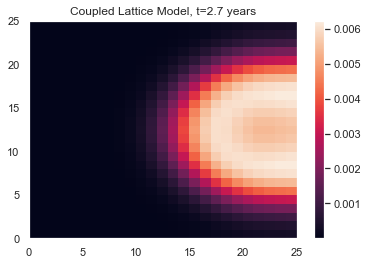

In [145]:
pl.pcolor(tc22)
pl.title('Coupled Lattice Model, t=2.7 years')
pl.colorbar()
pl.show()

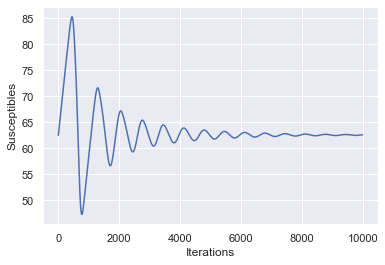

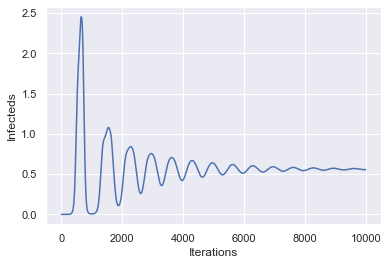

In [167]:
# times.remove(10001)

plt.plot(tcS)
plt.ylabel('Susceptibles')
plt.xlabel('Iterations')
plt.show()

plt.plot(tcI)
plt.ylabel('Infecteds')
plt.xlabel('Iterations')
plt.show()